#Dataset : https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

In [ ]:
!pip install pandas

# Introduction

This notebook aims at analysing the customer information in a company's database. To find out the group that is most likely to buy the products,customer segmentation can identify the target customers. After applying principal component analysis and k-means clustering on the dataset, we divide the customers into three groups. In short, we categorise the customers into groups of low, mid and high income and expenditure.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/marketing_campaign.csv', encoding="Latin1")

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


# EDA
  Exploratory Data Analysis which is one of the basic and essential steps of a data science project. A data scientist involves almost 70% of his work in doing the EDA of his dataset.

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


# **Data Wrangling**

Data Wrangling is the process of gathering, collecting, and transforming Raw data into another format for better understanding, decision-making, accessing, and analysis in less time. Data Wrangling is also known as Data Munging

In [ ]:
# First deal with marital status
df.Marital_Status.unique()
# we simply put the customer into 2 categories: in_relationship and not_in_relationship
# combineing the relationship to the teen and kid at home:
# adding 2 to the family size if the customer is in relationship, on the contrary, we add one

cust_relationship = {
    'Single' : 1,
    'Together' : 2,
    'Married' : 2,
    'Divorced' : 1,
    'Widow' : 1,
    'Alone' : 1,
    'Absurd' : 1,
    'YOLO' : 1
}

df['re_Marital_Status'] = df['Marital_Status'].map(cust_relationship)

for i in range(len(df)):
    df['Family_Size'] = df['re_Marital_Status'] + df['Teenhome'] + df['Kidhome']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,re_Marital_Status,Family_Size
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,1,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,2,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,2,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,2,3
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,1,0,0,3,11,0,2,5
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,1,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,2,3


In [ ]:
# sum all the accepted campigans
df['Cmp_accepted'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + \
df['AcceptedCmp5'] + df['Response']

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,re_Marital_Status,Family_Size,Cmp_accepted
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,1,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,1,3,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,2,2,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,2,3,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,3,11,0,2,3,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,1,0,0,3,11,0,2,5,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,3,11,0,1,1,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,3,11,0,2,3,0


In [ ]:
# df = df.dropna()
# df

In [ ]:
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
re_Marital_Status       0
Family_Size             0
Cmp_accepted            0
dtype: int64


In [ ]:
print('Enter duplicated: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)

Enter duplicated: 0


In [ ]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,re_Marital_Status,Family_Size,Cmp_accepted
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,1,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,1,3,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,2,2,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,2,3,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,2,3,0


In [ ]:
# sum the total products purchased
df['Tot_Products'] = df['MntFishProducts'] + df['MntFruits'] + df['MntMeatProducts'] + \
    df['MntWines'] + df['MntSweetProducts'] + df['MntGoldProds']

In [ ]:
# replace the na value in the 'Income' column with the mean of income
df.loc[(df['Income'].isnull() == True), 'Income'] = df['Income'].mean()

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['Age'] = 2023 - df['Year_Birth']

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,re_Marital_Status,Family_Size,Cmp_accepted,Tot_Products,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,1,1,1,1617,66
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,1,3,0,27,69
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,2,2,0,776,58
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,2,3,0,53,39
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,2,3,0,422,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,2,3,0,1341,56
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,3,11,0,2,5,1,444,77
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,1,1,1,1241,42
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,2,3,0,843,67


In [ ]:
print(df.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
re_Marital_Status      0
Family_Size            0
Cmp_accepted           0
Tot_Products           0
Age                    0
dtype: int64


In [ ]:
df2 = df.loc[: ,['Age','Family_Size','Income','Recency','Tot_Products','Cmp_accepted','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]

In [ ]:
df2.describe()

,Age,Family_Size,Income,Recency,Tot_Products,Cmp_accepted,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,54.194196,2.595089,52247.251354,49.109375,605.798214,0.446875,2.325000,4.084821,2.662054,5.790179,5.316518
std,11.984069,0.906959,25037.797168,28.962453,602.249288,0.890543,1.932238,2.778714,2.923101,3.250958,2.426645
min,27.000000,1.000000,1730.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,2.000000,35538.750000,24.000000,68.750000,0.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,53.000000,3.000000,51741.500000,49.000000,396.000000,0.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,64.000000,3.000000,68289.750000,74.000000,1045.500000,1.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,130.000000,5.000000,666666.000000,99.000000,2525.000000,5.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [ ]:
# df2['Age'].value_counts()

In [ ]:
df2

,Age,Family_Size,Income,Recency,Tot_Products,Cmp_accepted,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,66,1,58138.0,58,1617,1,3,8,10,4,7
1,69,3,46344.0,38,27,0,2,1,1,2,5
2,58,2,71613.0,26,776,0,1,8,2,10,4
3,39,3,26646.0,26,53,0,2,2,0,4,6
4,42,3,58293.0,94,422,0,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...
2235,56,3,61223.0,46,1341,0,2,9,3,4,5
2236,77,5,64014.0,56,444,1,7,8,2,5,7
2237,42,1,56981.0,91,1241,1,1,2,3,13,6
2238,67,3,69245.0,8,843,0,2,6,5,10,3


# Principal Component Analysis
Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation that converts a set of correlated variables to a set of uncorrelated variables.PCA is the most widely used tool in exploratory data analysis and in machine learning for predictive models.

In [ ]:
# standardize the data before PCA to avoid putting more weight on the columns who have large value
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)
df2_scaled

array([[ 0.98534473, -1.75911463,  0.23532677, ...,  2.51089024,
        -0.55078479,  0.69390374],
       [ 1.23573295,  0.44654827, -0.23582624, ..., -0.56871962,
        -1.1661254 , -0.13046347],
       [ 0.3176428 , -0.65628318,  0.77363327, ..., -0.22654075,
         1.29523705, -0.54264708],
       ...,
       [-1.01776106, -1.75911463,  0.18910632, ...,  0.11563813,
         2.21824797,  0.28172013],
       [ 1.06880747,  0.44654827,  0.67903514, ...,  0.79999587,
         1.29523705, -0.95483068],
       [ 1.23573295,  1.54937972,  0.02483795, ..., -0.56871962,
        -0.55078479,  0.69390374]])

In [ ]:
pca = PCA()
pca.fit(df2_scaled)

PCA()

In [ ]:
pca.explained_variance_ratio_
pca.explained_variance_ratio_.cumsum()

array([0.36365352, 0.50843581, 0.60987827, 0.69873962, 0.77436749,
       0.83893364, 0.88775121, 0.92581242, 0.95843968, 0.98602361,
       1.        ])

In [ ]:
# plt.figure(figsize=(10,8))
# plt.plot(range(12,11), pca.explained_variance_ratio_.cumsum(), marker='x', linestyle="--")
# plt.title('Explained variance by components')
# plt.xlabel('number of components')
# plt.ylabel('cumculative explained variance')

In [ ]:
# as rule of thumb, we take the number of components that account for 80% of the explained variance
pca6 = PCA(n_components=6)

In [ ]:
pca6.fit(df2_scaled)

PCA(n_components=6)

In [ ]:
pca6.transform(df2_scaled)
score_pca6 = pca6.transform(df2_scaled)
score_pca6

array([[ 2.52139411,  0.60430091, -0.52320727, -0.50472496,  1.3525499 ,
        -1.29029606],
       [-1.58331222, -0.4477374 ,  0.92545998,  1.37027085,  0.54644811,
         0.24076747],
       [ 1.5226247 ,  0.10847028,  0.06350576,  0.73736084, -0.99198522,
        -1.21787159],
       ...,
       [ 1.69072763, -1.1841122 , -0.12946506, -2.00102417, -0.15800387,
        -0.68024343],
       [ 1.65179107,  0.66552956,  0.45154161,  1.81030832, -0.90714763,
        -0.08130237],
       [-1.26616022,  0.99858503,  0.20151375,  1.14127677,  1.22352065,
         0.76295703]])

# K-Means Clustering
K-Means Clustering is an Unsupervised Machine Learning algorithm, which groups the unlabeled dataset into different clusters.





In [ ]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans_pca.fit(score_pca6)
    wcss.append(kmeans_pca.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

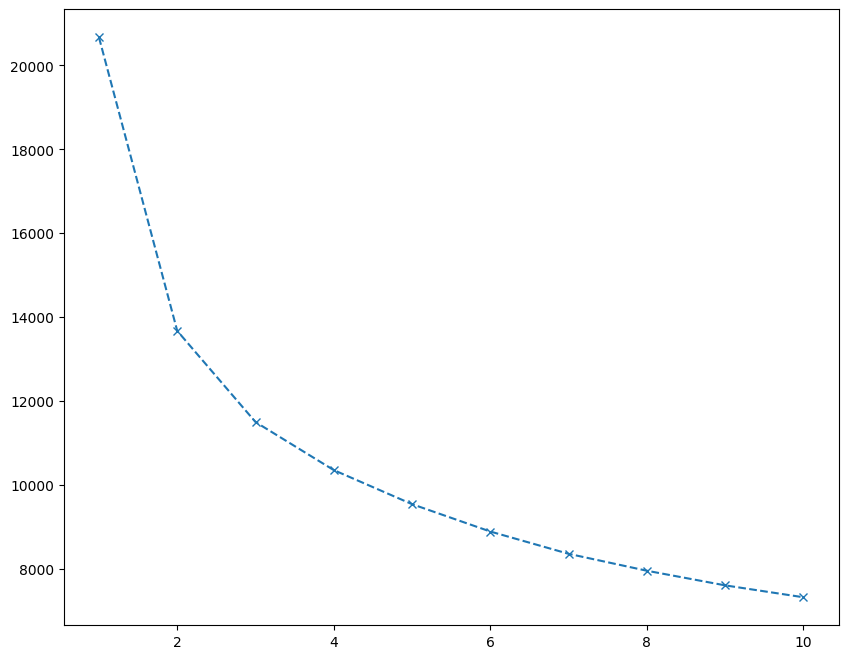

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker='x', linestyle='--')

In [ ]:
# from the graph above, we choose 3 as the number of clusters since the curve becomes smoother after 3
kmeans_pca = KMeans(n_clusters= 3, init='k-means++', random_state= 20)

In [ ]:
kmeans_pca.fit_transform(score_pca6)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[2.98751885, 4.84566517, 2.42082291],
       [3.34353969, 1.71382003, 4.58857236],
       [2.17383736, 3.80729782, 2.36721495],
       ...,
       [3.50699544, 4.14888243, 2.37041161],
       [2.37849907, 4.17299801, 2.77226754],
       [2.77294188, 2.33209115, 4.6205039 ]])

In [ ]:
pd.DataFrame(score_pca6)

,0,1,2,3,4,5
0,2.521394,0.604301,-0.523207,-0.504725,1.352550,-1.290296
1,-1.583312,-0.447737,0.925460,1.370271,0.546448,0.240767
2,1.522625,0.108470,0.063506,0.737361,-0.991985,-1.217872
3,-2.046154,-0.660531,-0.814648,0.083922,-0.928872,0.262614
4,-0.254344,1.021772,0.578661,-1.805470,-0.612951,0.700980
...,...,...,...,...,...,...
2235,0.869707,0.847886,0.047691,0.030149,-0.174647,-0.438391
2236,-0.488713,3.887623,0.591915,0.794002,1.339751,1.026659
2237,1.690728,-1.184112,-0.129465,-2.001024,-0.158004,-0.680243
2238,1.651791,0.665530,0.451542,1.810308,-0.907148,-0.081302


In [ ]:
df2_pca_kmeans = pd.concat([df2.reset_index(drop=True), \
    pd.DataFrame(score_pca6)], axis=1)
df2_pca_kmeans.columns.values[-6:] = ['pc1', 'pc2','pc3', 'pc4','pc5','pc6']

df2_pca_kmeans['cluster'] = kmeans_pca.labels_

In [ ]:
df2_pca_kmeans.head()

,Age,Family_Size,Income,Recency,Tot_Products,Cmp_accepted,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,pc1,pc2,pc3,pc4,pc5,pc6,cluster
0,66,1,58138.0,58,1617,1,3,8,10,4,7,2.521394,0.604301,-0.523207,-0.504725,1.352550,-1.290296,2
1,69,3,46344.0,38,27,0,2,1,1,2,5,-1.583312,-0.447737,0.925460,1.370271,0.546448,0.240767,1
2,58,2,71613.0,26,776,0,1,8,2,10,4,1.522625,0.108470,0.063506,0.737361,-0.991985,-1.217872,0
3,39,3,26646.0,26,53,0,2,2,0,4,6,-2.046154,-0.660531,-0.814648,0.083922,-0.928872,0.262614,1
4,42,3,58293.0,94,422,0,5,5,3,6,5,-0.254344,1.021772,0.578661,-1.805470,-0.612951,0.700980,0


In [ ]:
df2_pca_kmeans['cluster'] = df2_pca_kmeans['cluster'].map({0:'First', 1:'Second', 2:'Third'})
df2_pca_kmeans.head()

,Age,Family_Size,Income,Recency,Tot_Products,Cmp_accepted,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,pc1,pc2,pc3,pc4,pc5,pc6,cluster
0,66,1,58138.0,58,1617,1,3,8,10,4,7,2.521394,0.604301,-0.523207,-0.504725,1.352550,-1.290296,Third
1,69,3,46344.0,38,27,0,2,1,1,2,5,-1.583312,-0.447737,0.925460,1.370271,0.546448,0.240767,Second
2,58,2,71613.0,26,776,0,1,8,2,10,4,1.522625,0.108470,0.063506,0.737361,-0.991985,-1.217872,First
3,39,3,26646.0,26,53,0,2,2,0,4,6,-2.046154,-0.660531,-0.814648,0.083922,-0.928872,0.262614,Second
4,42,3,58293.0,94,422,0,5,5,3,6,5,-0.254344,1.021772,0.578661,-1.805470,-0.612951,0.700980,First


<Axes: xlabel='pc2', ylabel='pc1'>

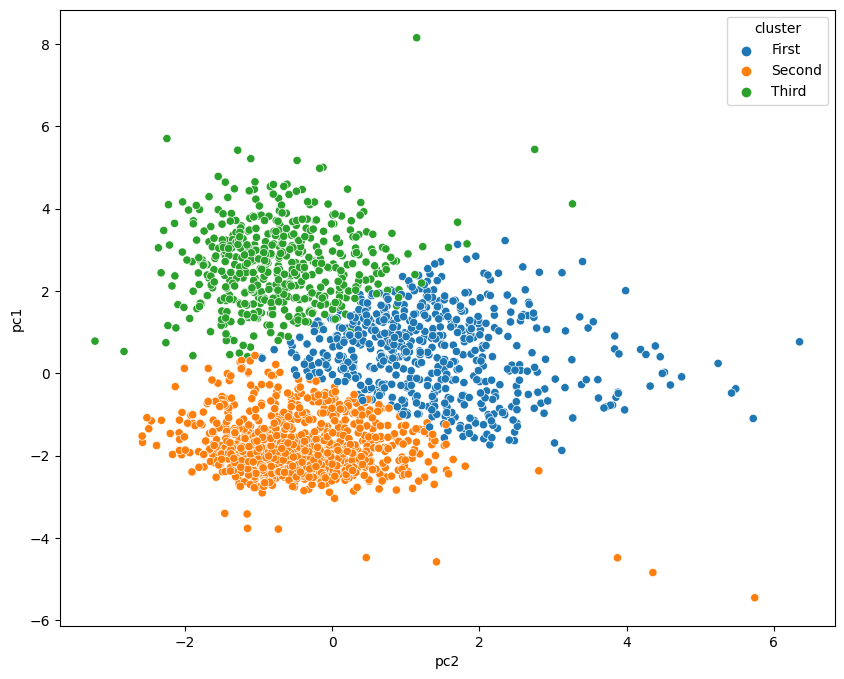

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(x='pc2', y='pc1', data=df2_pca_kmeans, hue='cluster', hue_order=['First', 'Second','Third'])

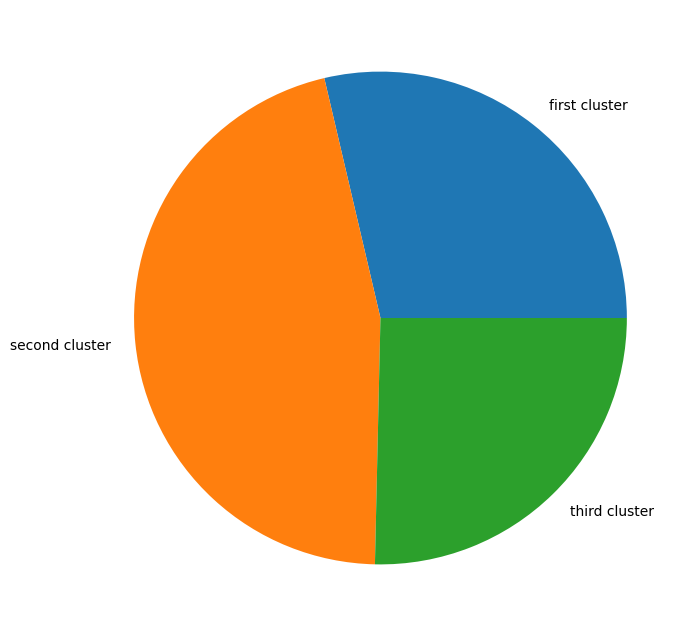

In [ ]:
plt.figure(figsize = (8,8))
pie = df2_pca_kmeans.groupby(['cluster']).size().to_frame().reset_index()
pie.rename(columns={0: 'count'}, inplace=True)

pie_labels = ['first cluster', 'second cluster', 'third cluster']
plt.pie(pie['count'], labels=pie_labels)
plt.show()

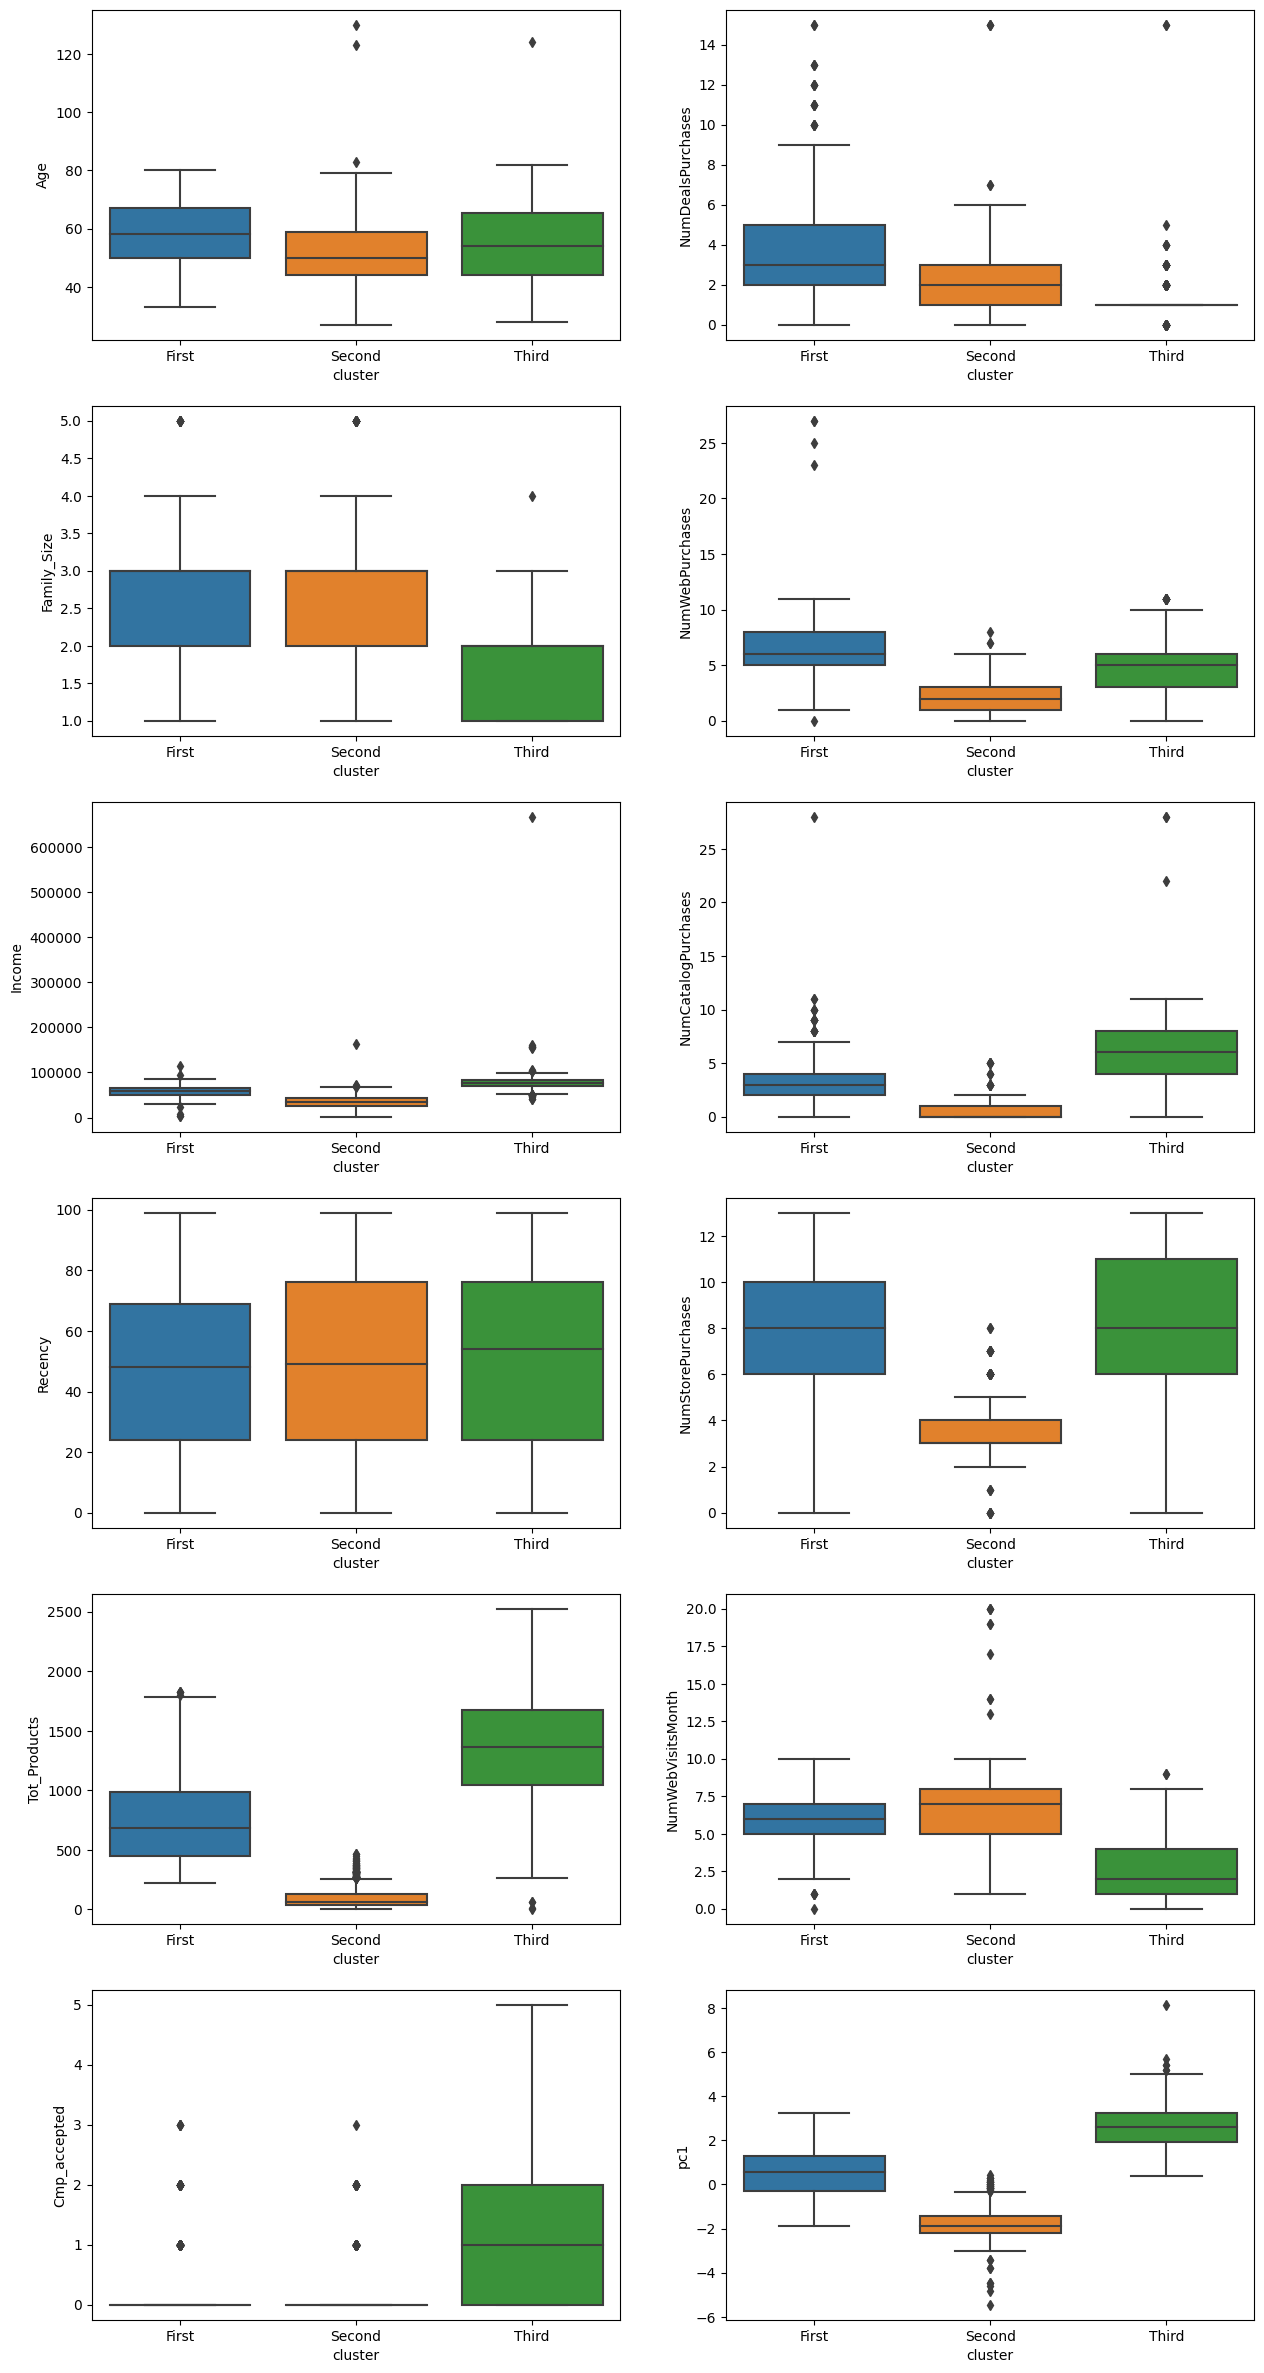

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15,30))
for cols, x in zip(df2_pca_kmeans.columns[:6], range(6)):
    for y in range(1):
        sns.boxplot(y=cols, x='cluster', data=df2_pca_kmeans, order=['First', 'Second','Third'], ax=axs[x,y], showfliers = True )

for cols, x in zip(df2_pca_kmeans.columns[6:], range(6)):
    for y in range(1,2):
        sns.boxplot(y=cols, x='cluster', data=df2_pca_kmeans, order=['First', 'Second','Third'], ax=axs[x,y], showfliers = True )


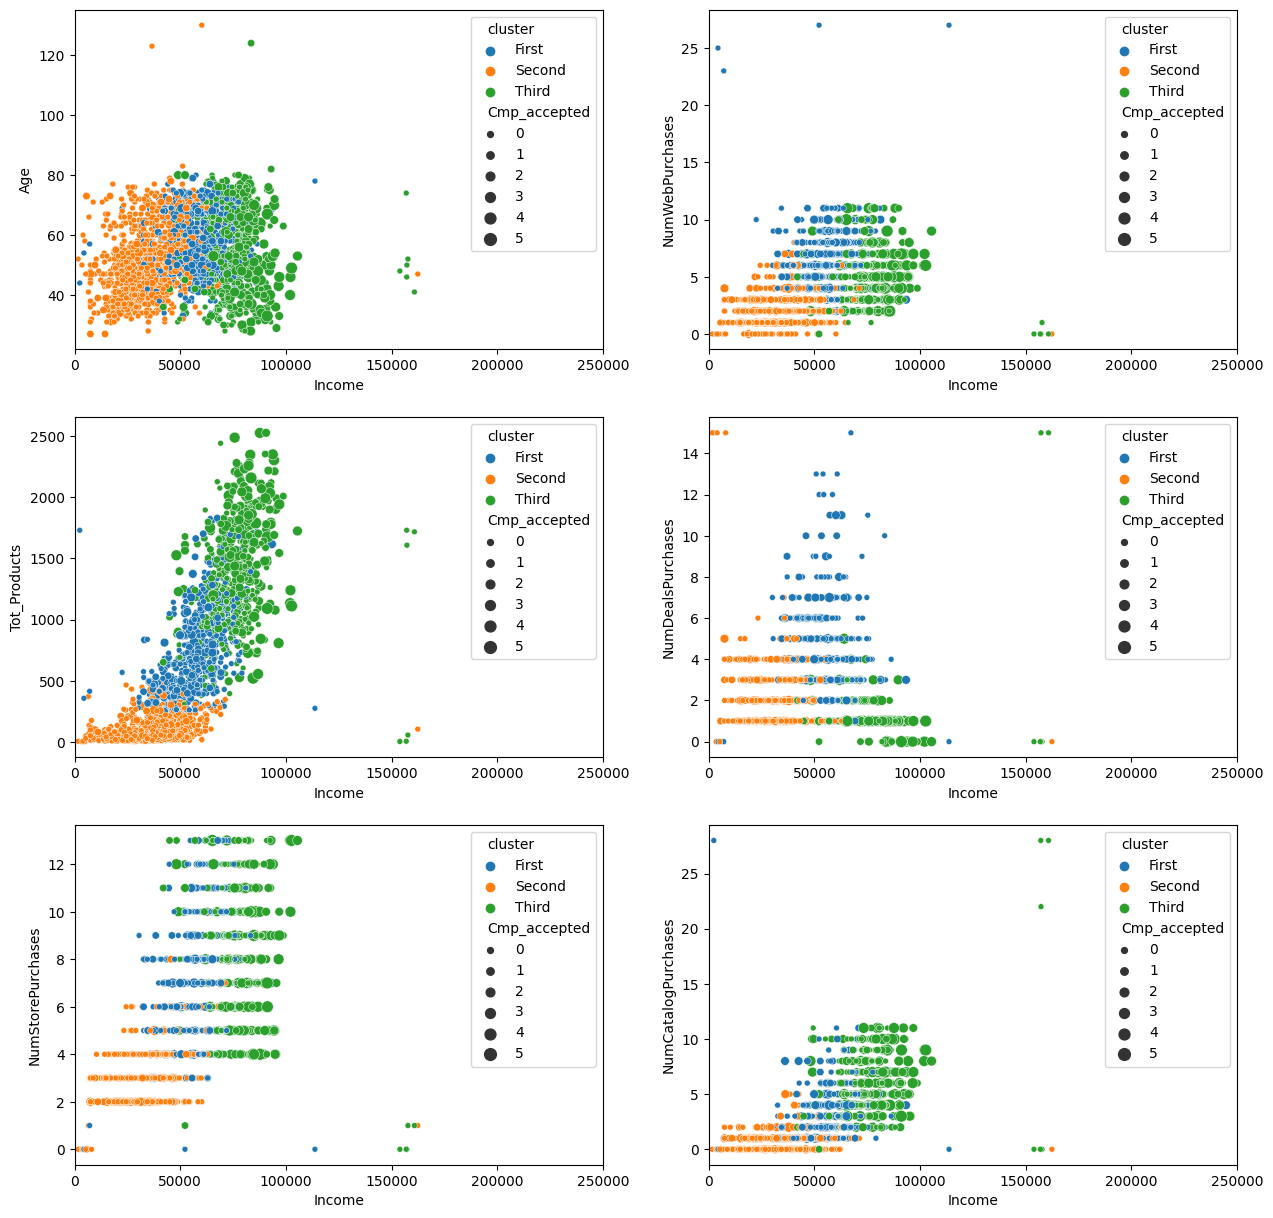

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15,15))

for cols, x in zip(['Age', 'Tot_Products','NumStorePurchases',], range(3)):
    for y in range(1):
        sns.scatterplot(x='Income',y=cols, data=df2_pca_kmeans, hue='cluster', size='Cmp_accepted' ,palette="tab10", ax=axs[x,y], hue_order=['First', 'Second','Third']).set(xlim=(0,250000))

for cols, x in zip(['NumWebPurchases','NumDealsPurchases','NumCatalogPurchases'], range(3)):
    for y in range(1,2):
        sns.scatterplot(x='Income',y=cols, data=df2_pca_kmeans, hue='cluster', size='Cmp_accepted' ,palette="tab10", ax=axs[x,y], hue_order=['First', 'Second','Third']).set(xlim=(0,250000))

In [ ]:
import pickle

pickle.dump(pca6, open('pca6.pkl', 'wb'))

In [ ]:
import pickle

pickle.dump(kmeans_pca, open('kmeans_pca.pkl', 'wb'))

In [ ]:
import pickle

pickle.dump(scaler, open('scaler.pkl', 'wb'))

#Results and Conclusion

---


### Group 1: Average Customers

People in this group have an average income, buy the average amount of products. Most of them engage in only one campaign, but they make more purchases when there is a discount. They tend to shop online more often than the other two groups.

### Group 2: Low-Income and Low-Engagemnet Customers

This group of customers has the lowest purchasing ability andspend very little on this company. Nearly all of them don’t participate in a campaign. However, they like to visit the online shop homepage.

### Group 3: High-Income and High-Spending Customers

Contrary to the second group, the third group has the highest incomeand purchasing record. Customers in this cluster usually have smallfamily sizes, accept more campaigns and love to make purchases instores or catalogs. They don’t visit shop website much but they stillmake moderate numbers of the web purchase. Also, the discount isnot attractive to them.

It is important to note that the size of the second group is the largest as it accounts for nearly half of the total customers. The size ofthe other two groups is similar. The company may leverage the current customer base and offer moreand launch campaigns to stimulate the shopping desire of the first andthird group of customers. More promotion on online stores can bemade to attack the second group of buyers since they spend much timebrowsing the webpage but make little purchases.

In [ ]:
import pandas as pd
import numpy as np
import pickle
import sklearn



cols = [66,1,58138,58,1617,1,3,8,10,4,7]



NameError: ignored